# Predicting Customer Churn

<img src="images/customer-churn.jpeg"/>

Customer churn is the loss of customers. Many businesses use predictions of customer churn as a key business metric because the cost of acquiring new customers is much higher than the cost of retaining existing customers.

We obtained a dataset from a telecommunications company (downloaded in October 2018 from https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/), which comprised demographic and account information on 7,032 customers. A subset of the variables are included in the dataset below.

Dataset: telco-churn.csv

Here is a detailed description of the variables:

    gender: the gender of the customer (Female or Male).

    SeniorCitizen: 1 if the customer is a senior citizen, 0 otherwise

    Partner: whether the customer has a partner

    Dependents: whether the customer has dependents tenure: how long the customer has been with the company (in months)

    PhoneService: whether the customer has phone service

    InternetService: what type of internet service the customer has (DSL, Fiber optic, or No)

    Contract: what type of contract the customer has (Month-to-month, One year, Two year)

    PaperlessBilling: whether the customer has set up paperless billing

    PaymentType: how the customer makes payments (Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check)

    MonthlyCharges: how much money the customer is charged a month

    TotalCharges: how much the customer has been charged over their tenure

    Churn: 1 if the customer has left the business, 0 otherwise

In this problem, we will use various classification methods to try to predict customer churn.

### Exploratory Data Analysis
Use the read.csv function to load the contents of telco-churn.csv into a data frame called customers.

In [1]:
# Load the Dataset

customers = read.csv("data/telco-churn.csv")

head(customers)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>
1,Female,0,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,Male,0,No,No,34,Yes,DSL,One year,No,Mailed check,56.95,1889.50,0
3,Male,0,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Male,0,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,0
5,Female,0,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,1
6,Female,0,No,No,8,Yes,Fiber optic,Month-to-month,Yes,Electronic check,99.65,820.50,1


In [2]:
str(customers)

'data.frame':	7032 obs. of  13 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ Contract        : Factor w/ 3 levels "Month-to-month",..: 1 2 1 2 1 1 1 1 1 2 ...
 $ PaperlessBilling: Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 2 1 2 1 ...
 $ PaymentMethod   : Factor w/ 4 levels "Bank transfer (automatic)",..: 3 4 4 1 3 3 2 4 3 1 ...
 $ MonthlyCharges  : num  29.9 57 53.9 42.3 70.7 ...
 $ TotalCharges    : num  29.9 1889.5 108.2 1840.8 151.7 ...
 $ Churn           : int  0 0 1 0 1 1 0 0 1 0 ...


In [3]:
summary(customers)

    gender     SeniorCitizen    Partner    Dependents     tenure     
 Female:3483   Min.   :0.0000   No :3639   No :4933   Min.   : 1.00  
 Male  :3549   1st Qu.:0.0000   Yes:3393   Yes:2099   1st Qu.: 9.00  
               Median :0.0000                         Median :29.00  
               Mean   :0.1624                         Mean   :32.42  
               3rd Qu.:0.0000                         3rd Qu.:55.00  
               Max.   :1.0000                         Max.   :72.00  
 PhoneService    InternetService           Contract    PaperlessBilling
 No : 680     DSL        :2416   Month-to-month:3875   No :2864        
 Yes:6352     Fiber optic:3096   One year      :1472   Yes:4168        
              No         :1520   Two year      :1685                   
                                                                       
                                                                       
                                                                       
      

**How many customers churned?**

In [4]:
# Calculate the number of customers that have churned
table(customers$Churn)


   0    1 
5163 1869 

Answer: 1869 customers have churned.

**What is the most common type of internet service in the dataset?**

In [5]:
# Tabulate the amount of customers for each internet service
table(customers$InternetService)


        DSL Fiber optic          No 
       2416        3096        1520 

Answer: Fiber optic is the most common type of internet service in the dataset.

**What is the mean monthly charges amongst customers with month-to-month contracts?**

In [6]:
# Tabulate the mean monthly chargers amongst customers with month-to-month contracts
tapply(customers$MonthlyCharges, customers$Contract =="Month-to-month", mean)

FALSE     TRUE 
62.83397 66.39849

Answer: 66.39849 is the mean monthly charges amongst customers with month-to-month contracts.

### Simple Logistic Regression
Set your random seed to 1 and create a training and test split using the sample.split() function in the caTools library, with 70% of the observations in the training set and 30% in the testing set.

In [7]:
library(caTools)

In [8]:
set.seed(1)

split = sample.split(customers$Churn, SplitRatio = 0.7)

train = subset(customers, split ==TRUE)
test = subset(customers, split == FALSE)

**Why do we use the sample.split() function?**

Answer: It balances the dependent variable between the training and testing sets

**What is the (test) accuracy of this baseline model?**

In [9]:
# Compute Baseline

Bl = table(test$Churn)
Bl


   0    1 
1549  561 

In [10]:
# Compute Baseline Accuracy

accurBl = max(Bl)/sum(Bl)
paste("Accuracy Baseline:", round(accurBl,digits=4))

[1] "Accuracy Baseline: 0.7341"

**What is the (test) true positive rate of this baseline model?**

In [11]:
# Compute True Positive Baseline

TP = Bl[2]/sum(Bl)
paste("True Positive Baseline:", round(TP,digits=4))

[1] "True Positive Baseline: 0.2659"

**Train a logistic regression model using tenure as the independent variable. What is the coefficient of tenure?**

In [12]:
# Logistic Regression Model with tenure 
ChurnLog = glm(Churn ~ tenure,  data=train, family=binomial)

summary(ChurnLog)


Call:
glm(formula = Churn ~ tenure, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1858  -0.8440  -0.4689   1.1690   2.3850  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.059313   0.050868   1.166    0.244    
tenure      -0.039493   0.001685 -23.435   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5699.5  on 4921  degrees of freedom
Residual deviance: 5005.1  on 4920  degrees of freedom
AIC: 5009.1

Number of Fisher Scoring iterations: 4


Answer: tenure (coefficient) = -0.039493.

**Using your logistic regression model, obtain predictions on the test set. Then, using a probability threshold of 0.5, create a confusion matrix for the test set. What is the accuracy of your logistic regression model?**

In [13]:
# Make predictions
predictTrain = predict(ChurnLog, newdata = test, type="response")

# Confusion matrix
cmLR = table(test$Churn, predictTrain > 0.5)
cmLR

   
    FALSE TRUE
  0  1478   71
  1   442  119

The rows are labeled with the actual outcome, and the columns are labeled with the predicted outcome.

                      Predict 0       Predict 1
        Actual 0    True Negative   False Positive
        Actual 1    False Negative  True Positive

        cmLR = [1][3]
               [2][4]

In [14]:
# Compute Logistic Regression Accuracy

accurLR = sum(diag(cmLR))/sum(cmLR)
paste("Accuracy Logistic Regression:", round(accurLR,digits=4))

[1] "Accuracy Logistic Regression: 0.7569"

**What is the true positive rate of your logistic regression model?**

In [15]:
# True Positive Rate = True Positive / All Real Posisitve

TPR = cmLR[4]/(cmLR[4]+cmLR[2])
paste("True Positive Rate in the Logistic Regression Model:", round(TPR,digits=4))

[1] "True Positive Rate in the Logistic Regression Model: 0.2121"

**What is the false positive rate of your logistic regression model?**

In [16]:
# False Positive Rate = False Positive / All Real Negative

FPR = cmLR[3]/(cmLR[3]+cmLR[1])
paste("False Positive Rate in the Logistic Regression Model:", round(FPR,digits=4))

[1] "False Positive Rate in the Logistic Regression Model: 0.0458"

**Suppose we wanted to to lower the prediction threshold (currently 0.5). Which metrics would be guaranteed to either improve or stay the same?**

Answer: False Positive Rate. With a lower prediction threshold, we will increase the number of Real Positive cases, and decrease the number of Real Negative cases, that is inversely proportional to the False Positive Rate. 

When we decrease the threshold, we get more positive values thus it increases the sensitivity and decreasing the specificity.

### Adding more variables
Train a logistic regression model now using all of the variables in the training set.

In [17]:
# Logistic Regression Model with all variables

ChurnLog2 = glm(Churn ~ .,  data=train, family=binomial)

summary(ChurnLog2)


Call:
glm(formula = Churn ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7135  -0.7003  -0.2996   0.7876   3.4895  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           1.103e-02  2.635e-01   0.042 0.966607    
genderMale                            4.286e-03  7.673e-02   0.056 0.955452    
SeniorCitizen                         1.721e-01  9.934e-02   1.733 0.083150 .  
PartnerYes                            9.759e-02  9.190e-02   1.062 0.288272    
DependentsYes                        -1.386e-01  1.054e-01  -1.316 0.188341    
tenure                               -6.070e-02  7.372e-03  -8.234  < 2e-16 ***
PhoneServiceYes                      -7.686e-01  1.716e-01  -4.480 7.47e-06 ***
InternetServiceFiber optic            9.785e-01  1.591e-01   6.150 7.77e-10 ***
InternetServiceNo                    -4.057e-01  2.247e-01  -1.806 0.070995 .  
Contra

**Which of the following variables are significant at a level of 0.05 or less?**

Answer:

    tenure
    PhoneServiceYes
    InternetServiceFiber optic
    ContractOne year
    ContractTwo year
    PaperlessBillingYes
    TotalCharges

**How would you interpret the coefficient of SeniorCitizen in the model?**

Answer: When the customer is a senior citizen, the odds of the customer churning are 17.2% higher than if the customer is not.

**Using your new logistic regression model, obtain predictions on the test set. Then, using a probability threshold of 0.5, create a confusion matrix for the test set. What is the accuracy of your logistic regression model?**

In [18]:
# Make predictions with test set
predictTrain = predict(ChurnLog2, newdata = test, type="response")

# Confusion matrix
cmLT = table(test$Churn, predictTrain > 0.5)
cmLT

   
    FALSE TRUE
  0  1398  151
  1   251  310

In [19]:
# Compute Logistic Regression Test Set Accuracy with all variables

accurLT = sum(diag(cmLT))/sum(cmLT)
paste("Accuracy Logistic Regression all variables:", round(accurLT,digits=4))

[1] "Accuracy Logistic Regression all variables: 0.8095"

**AUC?**

In [20]:
library(ROCR)

In [21]:
# Logistic Regression Prediction
ROCRpred = prediction(predictTrain, test$Churn)

# Area Under the ROC Curve (AUC)
AUC = as.numeric(performance(ROCRpred, "auc")@y.values)

paste("AUC Logistic Regression all variables:", round(AUC,digits=4))

[1] "AUC Logistic Regression all variables: 0.8436"

### CART
Set the random seed to 2.

Then use the caret package and the train function to perform 10-fold cross validation with the training data set to select the best cp value for a CART model that predicts the dependent variable Churn using all of the possible independent variables. Select the cp value from a grid consisting of the 50 values 0.001, 0.002, …, 0.05.

Remember to convert the Churn column to a factor variable. If you have called your training set trainset, use the following code:

    trainset\\$Churn = as.factor(trainset$Churn) 

Important Note: The train() function in caret does not handle factor variables well when they are used in a formula via the method that was shown in the recitation (e.g. Churn ~ . ). Because there are many factor variables in this dataset, please use the following workaround (assuming you have called your training set trainset) to cross-validate properly:

    cv = train(y = trainset$Churn, x = subset(trainset, select=-c(Churn)), method = “rpart”, trControl = …, tuneGrid = …)

where the trControl and tuneGrid arguments can be handled as you have done throughout the course (recall that we are performing 10-fold cross-validation on cp values 0.001, 0.002, …, 0.05).

In [22]:
# Set random seed
set.seed(2)

# Convert to a factor variable
train$Churn = as.factor(train$Churn)

In [23]:
# Cross-Validation

library(caret)
library(e1071)

library(rpart)
library(rpart.plot)

Loading required package: lattice

Loading required package: ggplot2



In [24]:
# Define cross-validation experiment
numFolds = trainControl( method = "cv", number = 10 )

cpGrid = expand.grid( .cp = seq(0.001,0.05,0.001)) 

# Perform the cross validation
cv = train(y = train$Churn, x = subset(train, select=-c(Churn)), method = "rpart", trControl = numFolds, tuneGrid = cpGrid)

# Create a new CART model
ChurnTreeCV = rpart(Churn ~ ., data = train, method="class", cp = 0.005)

**Which of the following variables appear in the tree?**

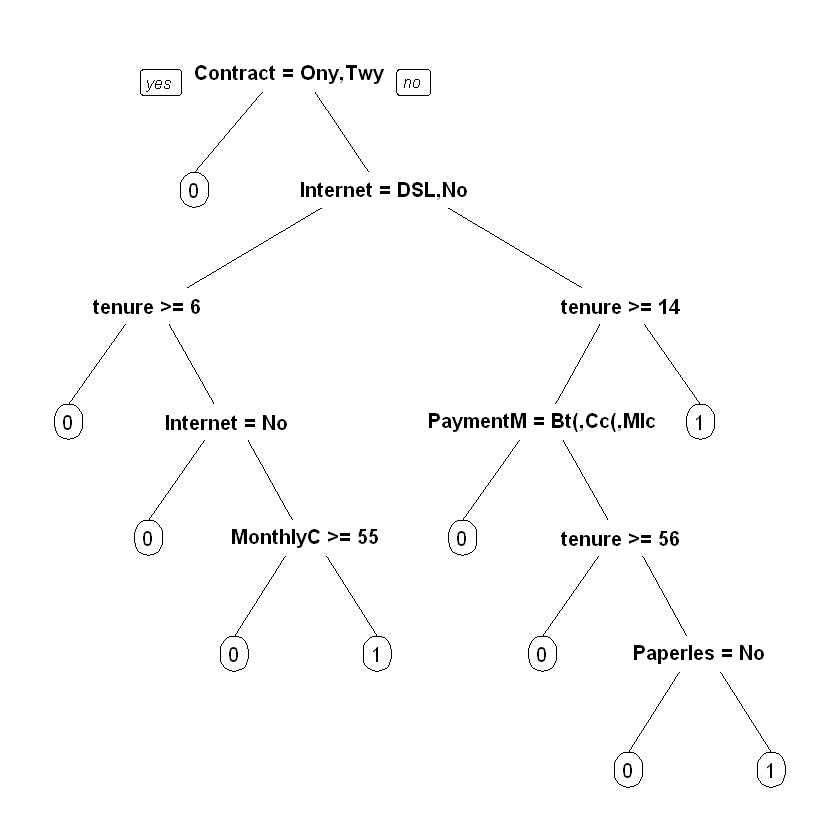

In [25]:
# CART Tree
prp(ChurnTreeCV)

Answer: Contract, Internet, tenure, PaymentM, MonthlyC, and Paperles.

**What is the (test) accuracy of your CART model?**

In [26]:
# Make predictions with CART model
PredictCV = predict(ChurnTreeCV, newdata = test, type = "class")

# Confusion Matrix
cmCV = table(test$Churn, PredictCV)
cmCV

   PredictCV
       0    1
  0 1340  209
  1  233  328

In [27]:
# Compute CART model accuracy

accurCV = sum(diag(cmCV))/sum(cmCV)
paste("Accuracy CART model:", round(accurCV,digits=4))

[1] "Accuracy CART model: 0.7905"

**What is the (test) true positive rate of your CART model?**

In [28]:
# True Positive Rate = True Positive / All Real Posisitve

TPRCA = cmCV[4]/(cmCV[4]+cmCV[2])
paste("True Positive Rate in the CART Model:", round(TPRCA,digits=4))

[1] "True Positive Rate in the CART Model: 0.5847"

**What is the (test) false positive rate of your CART model?**

In [29]:
# False Positive Rate = False Positive / All Real Negative

FPRCA = cmCV[3]/(cmCV[3]+cmCV[1])
paste("False Positive Rate in the CART Model:", round(FPRCA,digits=4))

[1] "False Positive Rate in the CART Model: 0.1349"

**What does the CART model predict for customer with a one-year contract and a tenure of 12?**

Answer: From the CART tree, the customer doesn’t churn (0).